In [1]:
import triangle as tr
import matplotlib.pyplot as plt
import gmsh_worker as gw

geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

Error   : Unknown number option 'Mesh.ElementType'


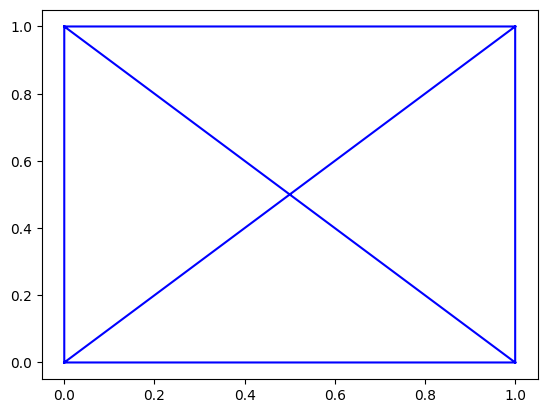

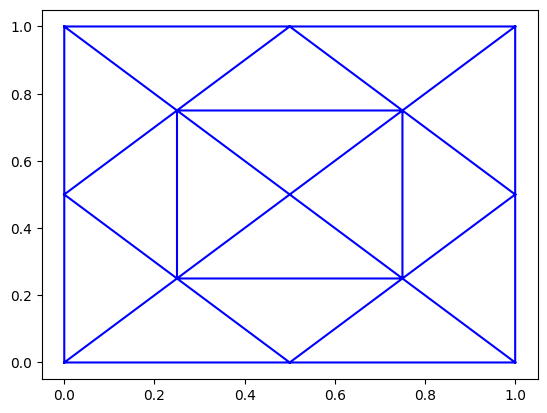

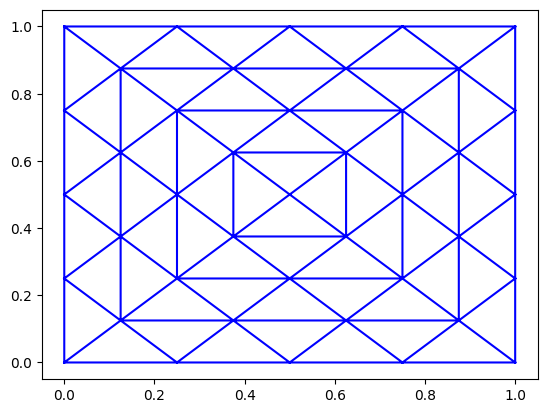

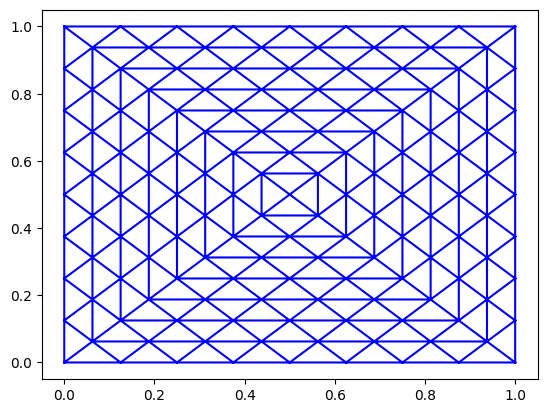

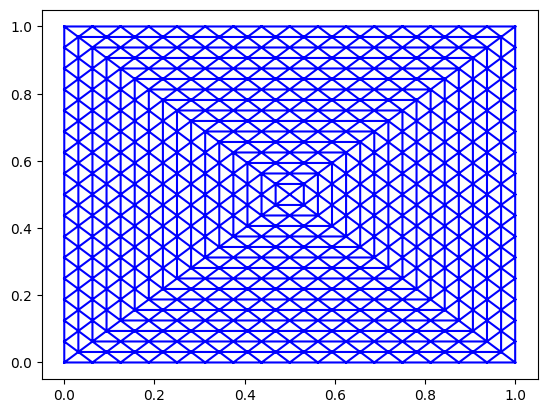

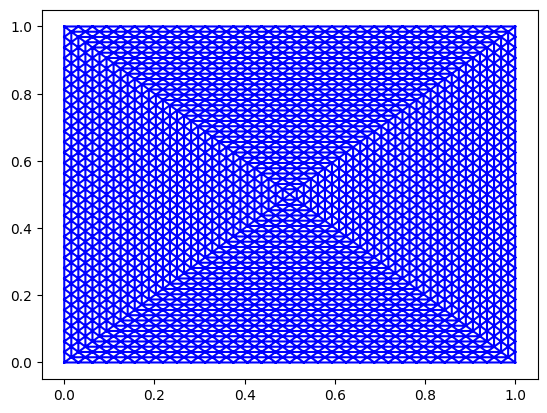

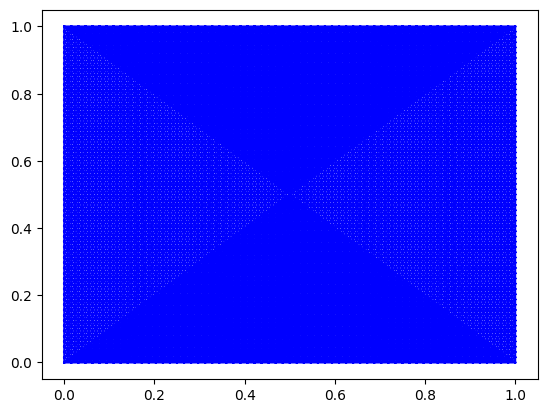

In [2]:
worker.construct_base_geo('./geo_core.txt', 1, 7, 1)
worker.generate_parallel_chain(verbose=True, delete=False, write=True)

In [ ]:
coarse_mesh = worker.chain[0]
fine_mesh = worker.chain[-1]

In [ ]:
import numpy as np
filt = np.array(fine_mesh['vertex_markers']).astype(bool).flatten()
# print(filt)
nodes_on_boundary = np.array(fine_mesh['vertices'])[filt]

filt = np.array(fine_mesh['edge_markers']).astype(bool).flatten()
nodes_of_edges_on_boundary = fine_mesh['vertices'][fine_mesh['edges'][filt]]
nodes_of_edges_on_boundary = np.reshape(nodes_of_edges_on_boundary, (-1,2))

plt.figure(figsize=(5.5,5))
plt.scatter(nodes_on_boundary[:,0], nodes_on_boundary[:,1], color='green',label='Boundary nodes')
plt.scatter(nodes_of_edges_on_boundary[:,0], nodes_of_edges_on_boundary[:,1], color='lightblue',marker='+', label='Nodes of boundary edges')
plt.triplot(fine_mesh['vertices'][:,0], fine_mesh['vertices'][:,1], fine_mesh['triangles'], color='lightgrey', zorder=-1)
plt.triplot(coarse_mesh['vertices'][:,0], coarse_mesh['vertices'][:,1], coarse_mesh['triangles'], color='grey', zorder=-1)
plt.legend()